In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd


"""
Download data from a google drive, create a 'data' folder and 
copy the four csv files into it
The file_ids must refer to files with 'public' option in 'share' parameter 
"""


file_ids = ['1kZVi3f6pHq3wyt4FpR_8-c4wwYgykL6o']

destinations = ['./data/data.csv']

for file_id, destination in zip(file_ids, destinations):

    gdd.download_file_from_google_drive(file_id=file_ids,
                                        dest_path=destination,
                                        unzip=False)

#  DataCamp Business Case - Kickstarter - Predicting success of fundraising

### Authors : Hamza Filali Baba - Eulalie Formery - Damien Grasset - Alice Guichenez - Hugo Perrin

M2 DataScience - Université ParisScalay
 
Professors: Alexandre GRAMFORT & Balazs KEGL

***

##  <a style="color:#00925B"> 1. Business case</a>

- Context
- Business problem
- Data presentation
- Limits of our approach

##  <a style="color:#00925B"> 2. Exporation of the data</a>

- a completer

##  <a style="color:#00925B"> 3. </a>

- a completer

# <a style="color:#00925B"> 1. Business case </a>

##  <span style="color:#00925B"> 1.1 Context  </span> 
 
Kickstarter is one of the world’s largest crowdfunding platforms for gathering money from the public. It is mainly focused on creativity-related projects, in particular in art, music and design. It helps creators to find the resources and support they need to make their projects come real. Kickstarter is a huge global community; 16 million people have brought their contribution to over 150,000 successful projects all over the world. 

##  <span style="color:#00925B"> 1.2 Business problem  </span> 

**Funding model**
 
The platform is based on an all or nothing funding model: project creators choose a deadline and a minimum funding goal, and money is collected only if the project reaches its goal by the deadline. It is a kind of insurance contract. The funding goal is chosen by the project kicker at the beginning and cannot be changed once the project has been launched. Whenever a project reaches the stated goal, the platform takes a 5% fee on the total amount of money collected. When a project fails, the platform does not gain anything. Therefore, it is to the benefit of Kickstarter that most projects are successful in reaching their funding goal by the deadline. Unlike many other platforms for fundraising and investment, Kickstarter claims no ownership over the projects and the work they produce – their profit is entirely based on the 5% fee they receive in case of success.

**Finding**

There is currently a 36.63% overall rate of success, with some categories performing especially well (almost 62% for dance projects) and others particularly poorly (26% only for fashion). The pie below represents the success rates for the 10 categories with most successes in absolute.

The failure rate is 52.6% and the rest of the projects are canceled or suspended. Our goal is to increase this rate of success based on the finding that some projects are more meant to success than others. 

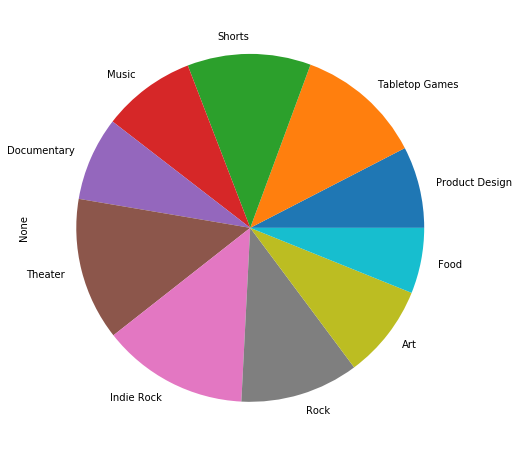

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/aliceguichenez/Documents/ks-projects-201801.csv")
data = data.dropna(subset=['name'])
sub_data = data.loc[data['state']=='successful']
categories = categories = [list(sub_data.groupby(['category','state']).count()['ID'].sort_values(ascending=False)[:10].index)[i][0] for i in range(10)]
success_rate = [len(sub_data.loc[sub_data['category']==cat])/len(data.loc[data['category']==cat]) 
                 if len(data.loc[data['category']==cat])!=0 else 0
                for cat in categories]
pd.Series(success_rate, index=categories).plot(kind='pie',  figsize = (10,8))

The chart below shows that it seems that the projects with highest goals have lower success rates.

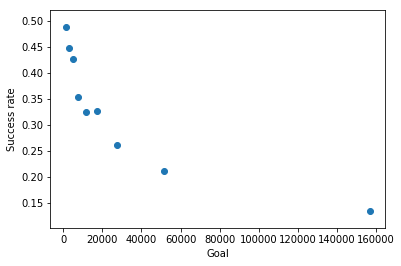

In [2]:
u = data['goal'].unique()
u.sort()

window = 10
intervals = [(u[int(len(u)*i/window)],u[int(len(u)*(i+1)/window)-1]) for i in range(window)]
successes = [len(data.loc[(data.goal <= intervals[i][1]) & (data.goal > intervals[i][0])
         & (data.state=='successful')])/len(data.loc[(data.goal <= intervals[i][1]) & (data.goal > intervals[i][0])]) 
             for i in range(window)]

plt.scatter([intervals[i][1] for i in range(len(intervals))][:-1], successes[:-1])
plt.ylabel("Gold")
plt.xlabel('Goal')
plt.ylabel('Success rate')
plt.show()

Based on these findings according to which the success rate may depend on the attributes of the projects, including the category and the goal among other things, our goal is to increase the success rate by predicting which attributes will make the projects get most chances to be successful.

**Business objective**

Kickstarter will make most money when most projects come to a success. Our objective is therefore to increase the chances of success of the projects by finding the relevant characteristics that will make them most likely to meet the goal by the deadline. By predicting whether a goal will be reached given a certain project, a certain funding target and a certain deadline, we should help fundraisers to pick adequate attributes and increase the rate of success, which should in turn increase Kickstarter’s profit. In this context, the key performance indicator that should be increased by good predictions is the rate of success – the percentage of projects that actually reach their goal by the deadline. 

**Users of our solution**

We could sell our solution to Kickstarter and imagine that they would include a kind of recommendation tool in their app, where fundraisers could input the attributes of their project and Kickstarter would provide them guidance to pick the best characteristics given the output probability of success. Project kickers would benefit from a personalized recommendation and accompaniment and Kickstarter would increase its chances to get the 5% fee.

**Prediction task**

Our database is composed of projects along with a short description, their deadlines, their funding target and the actual funds raised. The goal is to predict among new projects which ones will have highest chances of being successful. It is therefore a **binary classification task** – success or not. The result would lead to an ability to provide advice for a better design of the projects, increasing their chances of meeting the target amount by the deadline. 


**Benefits of a machine learning solution**

A machine learning solution is particularly relevant in this context where we can exploit the huge amount of available data to help the business flourish. It makes it possible to emphasize which characteristics would be better suited for each project, it gives the possibility to Kickstarter to provide a personalized accompaniment for the design of fundraising projects and therefore increases the added value of the app by offering an additional service. All in all, it increases the fees gathered by Kickstarter by increasing the rate of success.


**Business metrics**

A COMPLETER


**Workflow**

A COMPLETER

**Evolution of our solution in time** 

As new projects are launched, new data becomes available and our model can be improved by benefitting from this increased availability. Furthermore, it could also learn from its past mistakes and successes by evolving as the projects turn out to be failures or successes in accordance with or contrary to the predictions. Consequently, the model will have to be retrained on a regular basis – say once every two months, and this retraining could be based on online learning methods to make it as effective as possible. This would imply additional costs but also increased performance and accuracy for a thriving business.

##  <span style="color:#00925B"> 1.3 Data presentation  </span> 

The data comes from a scrapping of Kickstarter platform (https://www.kickstarter.com)which we got on this page (https://www.kaggle.com/kemical/kickstarter-projects/home).
Nb of lignes, stat des etc+ rep à la question What data cleaning/tidying steps were required to obtain clean training data


##  <span style="color:#00925B"> 1.4 Limits of our approach  </span> 

A first limit of our approach comes from the fact that the data we got is probably not enough to explain the successful aspect of the fundraising all by itself. Further data including detailed project description and information about the project kicker (how many projects they already launched and how many of them were successful, host country of the project, etc) would certainly have been useful. 
Another limit is that we only know if the projects are successful in the sense that the money has been collected or not. However, this should not be the only point of focus because it does not guarantee that once the funds have been collected, the project will be properly implemented: for example, if our model recommends lowering the target amount to get higher chances to collect the money, maybe this amount will underestimate the actual requirements of the project and it will not be realizable. Our point of view was to focus on the profit aspect of the business, but the success of the project once the money has been collected might be relevant to Kickstarter’s business as well. The ideal would have been to have further data about the success of the realization of the project itself and not of the collection of the funds only.

# <a style="color:#00925B"> 2. Exploration of the data </a>

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1)

## Modules

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec

from gensim.models import Doc2Vec
from scipy.spatial import distance
from nltk.corpus import stopwords
from gensim.models.doc2vec import LabeledSentence

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
from sklearn.base import BaseEstimator

from problem import get_train_data, get_test_data
from problem import metric_report

##  Load and clean data

In [3]:
data = pd.read_csv('../kickstarter-bis/data/test.csv')
data = data.dropna(subset=['name'])

data.index = np.arange(0, len(data))

In [4]:
## To do before in the "problem.py"

labels = data['pledged']
data.drop(['pledged', 'state', 'usd_pledged_real', 'pledged', 'usd pledged', 'backers'], 
          axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

## Feature extractor

In [5]:
# remove dashes and apostrophes from punctuation marks 
punct = string.punctuation.replace('-', '').replace("'",'')
# regex to match intra-word dashes and intra-word apostrophes
my_regex = re.compile(r"(\b[-']\b)|[\W_]")

def clean_string(string, punct=punct, my_regex=my_regex, to_lower=False):
    if to_lower:
        string = string.lower()
    # remove formatting
    str = re.sub('\s+', ' ', string)
     # remove punctuation
    str = ''.join(l for l in str if l not in punct)
    # remove dashes that are not intra-word
    str = my_regex.sub(lambda x: (x.group(1) if x.group(1) else ' '), str)
    # strip extra white space
    str = re.sub(' +',' ',str)
    # strip leading and trailing white space
    str = str.strip()
    return str

In [6]:
class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        
        #### NLP BASICS ####
        names = X['name'].tolist()
        cleaned_project_names = []
        
        for idx, doc in enumerate(names):
            # clean
            doc = clean_string(doc, punct, my_regex, to_lower=True)
            # tokenize (split based on whitespace)
            tokens = doc.split(' ')
            # remove digits
            tokens = [''.join([elt for elt in token if not elt.isdigit()]) for token in tokens]
            # remove tokens shorter than 3 characters in size
            tokens = [token for token in tokens if len(token) > 1]
            # remove tokens exceeding 25 characters in size
            tokens = [token for token in tokens if len(token) <= 25]
            cleaned_project_names.append(tokens)
            
        ##### Word2vect embedding
        self.model = Word2Vec(cleaned_project_names, min_count=1, size=100, workers=8)
        
        return self

    def transform(self, X):
        data = X.copy()
        
        #### SIMPLE TRANSFORMATION #### 
        
        data['launched_date'] = pd.to_datetime(data['launched'], format='%Y-%m-%d %H:%M:%S')
        data['deadline_date'] = pd.to_datetime(data['deadline'], format='%Y-%m-%d %H:%M:%S')
        
        # Length of project
        data['length'] = data['deadline_date'] - data['launched_date']
        data['length'] = [d.days for d in data['length']]
        
        # Features with month and year of launch
        data['year'] = [d.year for d in data['launched_date']]
        data['month'] = [d.month for d in data['launched_date']]
        data['day'] = [d.day for d in data['launched_date']]
        
        # Length of name
        data['name_length'] = [len(name) for name in data['name']]

        # Number of words
        data['word_number'] = [len(name.split(' ')) for name in data['name']]

        # Ponctuation
        data['question'] = (data.name.str[-1] == '?').astype(int)
        data['exclamation'] = (data.name.str[-1] == '!').astype(int)

        # Upper
        data['uppercase'] = data.name.str.isupper().astype(float)
        
        # Create dummies for categorical features
        main_category = pd.get_dummies(data['main_category'],prefix='mc')
        category = pd.get_dummies(data['category'], prefix = 'cat')
        country = pd.get_dummies(data['country'], prefix = 'country')
        currency = pd.get_dummies(data['currency'], prefix = 'currency')

        data = pd.concat([data, main_category, category, country, currency], axis=1)
        
        # Drop several features
        names = data['name'].tolist()

        features_to_drop =['main_category', 'category', 'country', 'currency', 'name',
                           'deadline', 'deadline_date', 'launched_date', 'launched',
                           'usd_goal_real', 'ID']
        data.drop(features_to_drop, axis=1, inplace=True)

        #### NLP BASICS ####
        cleaned_project_names = []
        
        for idx, doc in enumerate(names):
            # clean
            doc = clean_string(doc, punct, my_regex, to_lower=True)
            # tokenize (split based on whitespace)
            tokens = doc.split(' ')
            # remove digits
            tokens = [''.join([elt for elt in token if not elt.isdigit()]) for token in tokens]
            # remove tokens shorter than 3 characters in size
            tokens = [token for token in tokens if len(token) > 1]
            # remove tokens exceeding 25 characters in size
            tokens = [token for token in tokens if len(token) <= 25]
            cleaned_project_names.append(tokens)
            
        name_matrix = np.zeros((len(cleaned_project_names), 100), dtype="float32")

        for i in range(len(cleaned_project_names)):
            try:
                name_matrix[i,]= self.model.wv[cleaned_project_names[i]].sum(0) / len(cleaned_project_names[i]) 
            except:
                pass
                
        name_embeddings = pd.DataFrame(name_matrix)
        
        data = pd.concat([data, name_embeddings], axis=1)
        
        return data

## Regressor

In [7]:
class Regressor(BaseEstimator):
    
    def __init__(self):
        self.model = LGBMRegressor()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        prediction = self.model.predict(X)
        return np.maximum(prediction, np.zeros(prediction.shape[0]))

## Model

In [8]:
feature_extractor = FeatureExtractor()

feature_extractor.fit(X_train, y_train)

X_train = feature_extractor.transform(X_train)
X_test = feature_extractor.transform(X_test)

In [9]:
lgb_regressor = Regressor()

lgb_regressor.fit(X_train, y_train)

y_pred = lgb_regressor.predict(X_test)

## Metrics

In [10]:
metric_report(X_test, y_true=y_test, y_pred=y_pred)

-------- REGRESSION METRICS --------

RMSE: 78447.00
MAE: 13146.39

-------- CLASSIFICATION METRICS --------

Accuracy: 0.65
Precision: 0.49
Recall: 0.39
